In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('pasta_input.csv', delimiter=';')
df['ratio'] = df['m1'] / df['m0']
df.head()

,date,type,m0,t,m1,ratio
0,15.10.25,e,163,13,322,1.975460
1,17.10.25,s,200,9,445,2.225000
2,21.10.25,e,168,13,330,1.964286
3,24.10.25,s,200,9,452,2.260000
4,26.10.25,s,150,9,328,2.186667


In [3]:
pasta_pal= {
    'spaghetti': "#d28ff9",
    'elicoidali': "#78c7ee",
    'mafalde': "#faed34",
    'fusilli': "#7ff9ae",
    'farfalle': "#f882b9",
}

pasta_pal_light = {
    'spaghetti': '#e4c1f9',
    'elicoidali': '#a9def9',
    'mafalde': '#fcf6bd',
    'fusilli': '#d0f4de',
    'farfalle': '#ff99c8',
}

In [4]:
pasta_dict = {
    's': 'spaghetti',
    'e': 'elicoidali',
    'm': 'mafalde'
}

df['pasta'] = df['type'].copy()
df['pasta'] = df['type'].map(pasta_dict)

df.head()

,date,type,m0,t,m1,ratio,pasta
0,15.10.25,e,163,13,322,1.975460,elicoidali
1,17.10.25,s,200,9,445,2.225000,spaghetti
2,21.10.25,e,168,13,330,1.964286,elicoidali
3,24.10.25,s,200,9,452,2.260000,spaghetti
4,26.10.25,s,150,9,328,2.186667,spaghetti


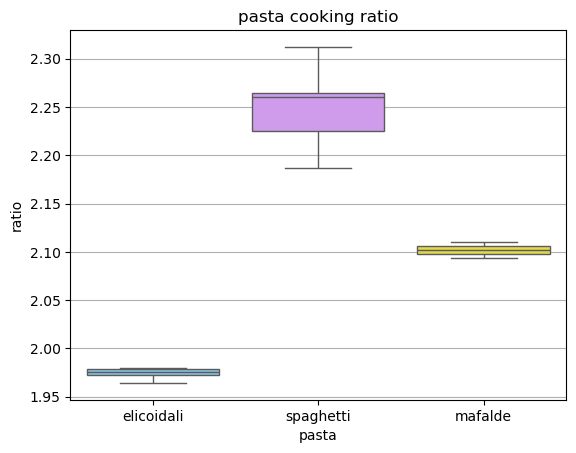

In [5]:
sns.boxplot(
    data = df,
    x = 'pasta',
    hue = 'pasta',
    y = 'ratio',
    palette=pasta_pal
)

#plt.ylim(0,2.5)

plt.grid(axis='y')
plt.title('pasta cooking ratio');

In [6]:
ratio_df = (
    df
    .groupby('type')['ratio']
    .mean()
)

ratio_df

type
e    1.974169
m    2.101908
s    2.249871
Name: ratio, dtype: float64

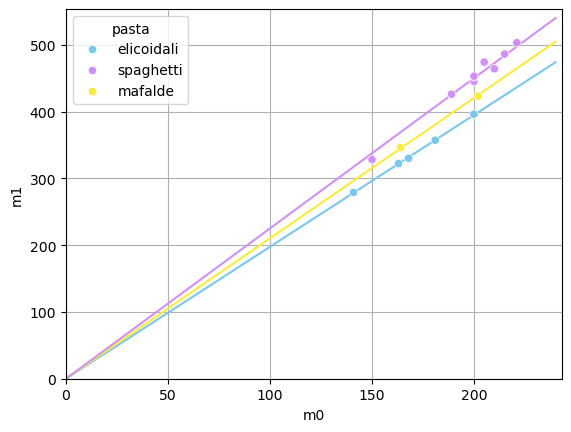

In [7]:
sns.scatterplot(
    data=df,
    x='m0',
    y='m1',
    hue='pasta',
    zorder=3,
    palette=pasta_pal
)

plt.xlim(0,df['m0'].max()*1.1)
plt.ylim(0,df['m1'].max()*1.1)

plt.grid(zorder=1)


x = np.linspace(0,240)

for t, r in ratio_df.items():
    plt.plot(x, r*x, color=pasta_pal[pasta_dict[t]])


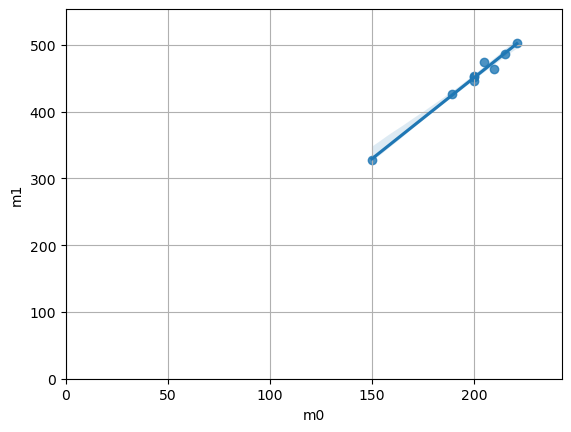

In [8]:
sns.regplot(
    data=df[df['type'] == 's'],
    x='m0',
    y='m1'
)

plt.xlim(0,df['m0'].max()*1.1)
plt.ylim(0,df['m1'].max()*1.1)

plt.grid(zorder=1)
